In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
path = "task_2.jpg"
img = cv2.imread(path)
#print(img.shape)

# Resizing image

In [3]:
width,height = 800,800
imgResize = cv2.resize(img,(width,height))
print(imgResize)

[[[128  95  81]
  [ 87  77  73]
  [114 127 135]
  ...
  [  6   2   1]
  [  6   2   1]
  [  6   2   1]]

 [[128  96  80]
  [ 89  79  75]
  [119 132 138]
  ...
  [  5   1   0]
  [  5   1   0]
  [  5   1   0]]

 [[120  88  74]
  [ 88  78  75]
  [114 127 134]
  ...
  [  5   1   0]
  [  5   1   0]
  [  5   1   0]]

 ...

 [[116 125 128]
  [114 123 126]
  [115 124 127]
  ...
  [142 150 150]
  [147 155 155]
  [128 136 136]]

 [[110 118 122]
  [118 127 130]
  [126 135 138]
  ...
  [138 146 146]
  [140 148 148]
  [134 142 142]]

 [[121 130 133]
  [121 130 133]
  [121 130 133]
  ...
  [140 148 148]
  [140 148 148]
  [140 148 148]]]


# GRAY > BLUR > CANNY

In [4]:
cv2.imshow("resizzed",imgResize)
gray = cv2.cvtColor(imgResize, cv2.COLOR_BGR2GRAY)
#cv2.imshow('Gray image', gray)
blur = cv2.GaussianBlur(gray,(5,5),0) 
canny = cv2.Canny(blur,75,75)
#cv2.imshow("canny",canny) 

# Contours and Threshold

In [5]:
contours, hierarchy = cv2.findContours(canny,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
print(f'{len(contours)} contours found!')
cv2.drawContours(img, contours, -1, (0, 255, 0), 3)

2100 contours found!


array([[[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  7,   3,   2],
        [  7,   3,   2],
        [  7,   3,   2]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  7,   3,   2],
        [  7,   3,   2],
        [  7,   3,   2]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  6,   2,   1],
        [  6,   2,   1],
        [  6,   2,   1]],

       ...,

       [[120, 129, 132],
        [121, 130, 133],
        [122, 131, 134],
        ...,
        [140, 148, 148],
        [140, 148, 148],
        [140, 148, 148]],

       [[120, 129, 132],
        [120, 129, 132],
        [120, 129, 132],
        ...,
        [139, 147, 147],
        [139, 147, 147],
        [139, 147, 147]],

       [[127, 136, 139],
        [124, 133, 136],
        [122, 131, 134],
        ...,
        [138, 146, 146],
        [138, 146, 146],
        [138, 146, 146]]

In [6]:
ret,thresh1 = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(gray,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(gray,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(gray,127,255,cv2.THRESH_TOZERO_INV)

In [7]:
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

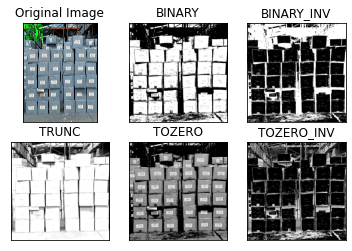

In [8]:
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

In [9]:
plt.show()

In [10]:
blank= np.zeros(imgResize.shape[:2], dtype='uint8')
#cv2.imshow('blank',blank)

In [11]:
blank = cv2.drawContours(blank, contours, -1, (0,255,0), 3)
#cv2.imshow('Blank',blank)
cv2.imshow('contours',canny)

# BGR to HSV

In [12]:
hsv = cv2.cvtColor(imgResize, cv2.COLOR_BGR2HSV)
cv2.imshow('hsv',hsv)

# BGR to LAB

In [13]:
lab = cv2.cvtColor(imgResize, cv2.COLOR_BGR2LAB)
cv2.imshow('lab',lab)

# Color channels

b,g,r = cv2.split(blank)
cv2.imshow('b',b)
cv2.imshow('g',g)
cv2.imshow('r',r)
print(blank.shape)
print(b.shape)
print(g.shape)
print(r.shape)

# Laplacian

In [15]:
lap = cv2.Laplacian(gray, cv2.CV_64F)
lap = np.uint8(np.absolute(lap))
cv2.imshow('Laplacian', lap)

# Sobel 

In [16]:
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1)
combined_sobel = cv2.bitwise_or(sobelx, sobely)

In [17]:
cv2.imshow('Sobel X', sobelx)
cv2.imshow('Sobel Y', sobely)
cv2.imshow('Combined Sobel', combined_sobel)

# Masking

In [18]:
mask = cv2.rectangle(blank.copy(), (278, 306), (390, 425), 300, -1)

In [19]:
cv2.imshow('mask',mask)
masked = cv2.bitwise_and(imgResize,imgResize,mask=mask)
cv2.imshow('Masked image', masked)

In [20]:
cv2.waitKey(0)
cv2.destroyAllWindows()